In [172]:
# Group 29
# Assignment 6 | Author: Yash Kumar Sahu | Roll No: CED19I039 
# Assignment 6 | Author: Radhika Mittal | Roll No: CED19I050
# Assignment 6 | Author: Deep Patel | Roll No: ME21D0004

## Libraries


In [1]:
from matplotlib import pyplot as plt                                              
import cv2
import glob
import os
import numpy as np
import ntpath
import math


## Read Lena Image 

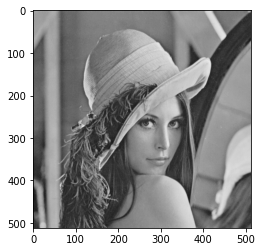

In [2]:
cwd = os.getcwd()                                            # get current directory
img = cv2.imread(cwd+"/Lena.png") 
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)             # Convert to grayscale

plt.imshow(gray_img, cmap='gray', vmin = 0, vmax = 255)


Adding salt and pepper noise


In [8]:
## Function to add salt and pepper noise
def sp_noise(image,prob):

    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [15]:
## Add gaussian noise no to input gray image X 10
noise_gray_img=[]
for i in range(1,11):
    noise_gray_img.append(sp_noise(gray_img,0.1*i))

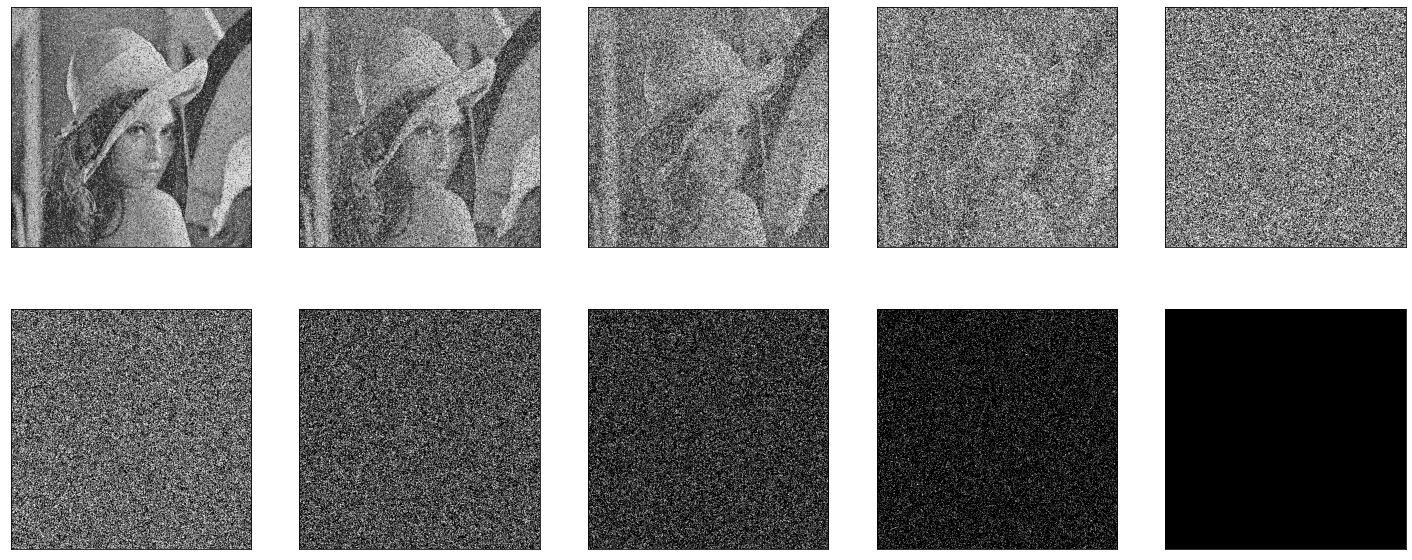

In [16]:
## Display noise image
f = plt.figure()
f.set_figwidth(5*5)
f.set_figheight(2*5)

for i in range(10):
    # display Different Angle
    
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(noise_gray_img[i],  cmap='gray', vmin = 0, vmax = 255)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.subplots_adjust(hspace = 0.25 )
plt.show()  

In [ ]:
## Average of noisy images
average_img=np.zeros(noise_gray_img[0].shape,np.double)
for im in noise_gray_img:
    average_img=average_img+np.array(im,dtype=np.double)/10
average_img=np.array(np.round(average_img),dtype=np.uint8)   


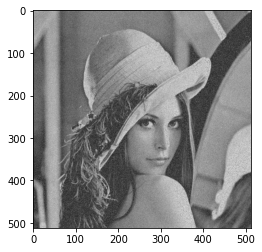

In [ ]:
## Display Average of noisy images
plt.imshow(average_img, cmap='gray', vmin = 0, vmax = 255) 

In [ ]:
## For quantitative observation
reference_gray_image=gray_img

for i in range(10):
    rmse=math.sqrt(np.mean(np.square(reference_gray_image-noise_gray_img[i])))
    print(rmse)
    noise_gray_img.append(rmse)  
gray_image_rmse=np.array(noise_gray_img)      
rmse=math.sqrt(np.mean(np.square(average_img-noise_gray_img[i]))) 
print(rmse)

9.882656171564966
9.897390935016997
9.871985059742311
9.876017650849587
9.87609664042805
9.887462236836269
9.8744174447431
9.888254083362678
9.87426465350761
9.87594599960971
9.855973855590824


C:\Users\deep0\AppData\Local\Temp\ipykernel_10796\2235735322.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  gray_image_rmse=np.array(noise_gray_img)


Refer


https://github.com/KiranThomasCherian/Computer-Vision-And-Digital-Image-Processing/blob/main/Assignment%202/QUESTION_1.ipynb